## Observations and Insights

## Dependencies and starter code

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

## Summary statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

combined_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
grouped_data = combined_data.groupby(combined_data["Drug Regimen"])

mean_data = grouped_data["Tumor Volume (mm3)"]
summary_combined_data = pd.DataFrame({
    "Tumor Mean": mean_data.mean(),
    "Tumor Median": mean_data.median(),
    "Tumor Variance": mean_data.var(),
    "Tumor STD": mean_data.std(),
    "Tumor SEM": mean_data.sem(),
    "Rat Count": mean_data.count(),
    "Rat Genders": grouped_data["Sex"]
})
#mean_data.head()
summary_combined_data

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM,Rat Count,Rat Genders
Drug Regimen,,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230,"(Capomulin, [Female, Female, Female, Female, F..."
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178,"(Ceftamin, [Female, Female, Female, Female, Fe..."
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178,"(Infubinol, [Female, Female, Female, Female, F..."
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188,"(Ketapril, [Female, Female, Female, Male, Male..."
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186,"(Naftisol, [Female, Female, Female, Female, Fe..."
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181,"(Placebo, [Female, Female, Female, Female, Fem..."
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161,"(Propriva, [Female, Female, Female, Female, Fe..."
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228,"(Ramicane, [Male, Male, Male, Male, Male, Male..."
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181,"(Stelasyn, [Female, Female, Female, Female, Fe..."


## Bar plots

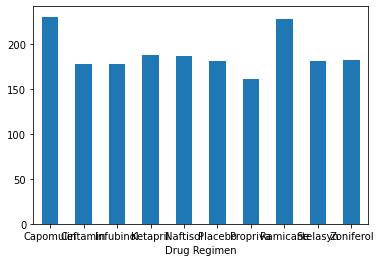

In [54]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
rat_df = summary_combined_data["Rat Count"]

ax = rat_df.plot.bar(x="Drug Regimen", y="Rats", rot=0)

<BarContainer object of 10 artists>

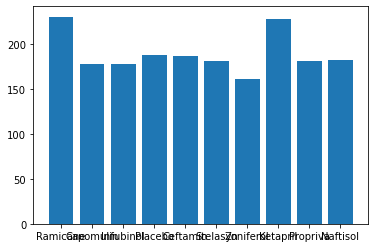

In [35]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = combined_data["Drug Regimen"].unique()
drug_rat_chart = plt.bar(drug_regimen, summary_combined_data["Rat Count"])
drug_rat_chart

## Pie plots

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_rats = combined_data.groupby("Drug Regimen")
#gender_rats["Drug Regimen"] = combined_data["Drug Regimen"]
#gender_rats.head()
summary_combined_data["Rat Genders"]

Drug Regimen
Capomulin    (Capomulin, [Female, Female, Female, Female, F...
Ceftamin     (Ceftamin, [Female, Female, Female, Female, Fe...
Infubinol    (Infubinol, [Female, Female, Female, Female, F...
Ketapril     (Ketapril, [Female, Female, Female, Male, Male...
Naftisol     (Naftisol, [Female, Female, Female, Female, Fe...
Placebo      (Placebo, [Female, Female, Female, Female, Fem...
Propriva     (Propriva, [Female, Female, Female, Female, Fe...
Ramicane     (Ramicane, [Male, Male, Male, Male, Male, Male...
Stelasyn     (Stelasyn, [Female, Female, Female, Female, Fe...
Zoniferol    (Zoniferol, [Female, Female, Female, Female, F...
Name: Rat Genders, dtype: object

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, outliers and boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [95]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_data["Drug Regimen"]["Capomulin"]

KeyError: 'Capomulin'

Text(0, 0.5, 'Weight (g)')

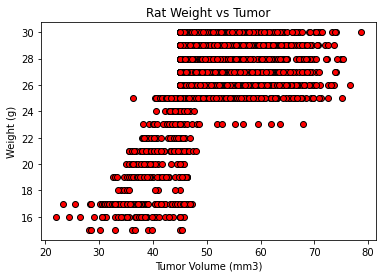

In [99]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_volume = combined_data["Tumor Volume (mm3)"]
rat_weight = combined_data["Weight (g)"]
plt.scatter(tumor_volume, rat_weight, marker="o", facecolors="red", edgecolors="black")
plt.title("Rat Weight vs Tumor")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

In [42]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen